In [1]:
import numpy as np
import random

<h2>Generating a single bandit</h2>

In [2]:
def Bandit(num_of_arms):
  '''
  Bandit Generator
  An n armed bandit with user chosen number of arms

  Inputs: 1) Number of arms.
  Outputs: 1) A list of rewards for each arm.
           2) An evenly incremented list of true values.
           3) A list with counters for each action.
  '''
  global true_values, true_values_counters, current_rewards
  # a list of true action values
  true_values = [round(x,10) for x in np.linspace(0, 2, num_of_arms).tolist()]

  # adding a zero vector to act as a counter for the number times an arm has been chosen
  true_values_counters = [[value, 0] for value in true_values]

  # making a list of zeros that represents rewards from each arm
  current_rewards = []
  for n in range(num_of_arms):
    current_rewards.append(10)


  # print(f"Your {num_of_arms}-armed Bandit is ready!")
  return true_values, true_values_counters, current_rewards

<h2>Choosing the next arm using the e-greedy method</h2>

In [3]:
def GreedyMethod(current_rewards, exploration_rate):
  '''
Greedy Action Method
The greedy action selection method, selects the action (or one of the actions)
with the highest estimated action value; ties are broken arbitrarily.
Once in a while using specified exploration_rate the method will select
a random action.

Inputs: 1) Current rewards list and exploration rate.
        2) The exploration rate (ε).
Outputs: 1) The index of the next action.
  '''
  global max_values, next_action
  # select action with the highest estimated action value
  max_values = max(current_rewards)

  # count the number of currently tied maximum estimated action values
  max_count = current_rewards.count(max_values)
  is_unique_max = max_count == 1

  # generate a random number to decide whether to explore or exploit
  decision_value = random.random()

  # check whether to explore or exploit:
  if decision_value < exploration_rate:   # explore
    # print("We will be exploring options.")
    # then create a list of tuples that is the tied maximum values, and their associated arms
    paired_list = [[value, index] for index, value in enumerate(current_rewards)] #GPT
    # generating a random number to randomly select an index from list of tied arms
    paired_list_rand_value = random.randint(0, len(paired_list)-1)
    # finding the associated arm that the randomly chosen tied max value comes from
    next_action = paired_list[paired_list_rand_value][1]

  else:  # exploit
    # print("We will be exploiting the current action.")
    # check if there is any tied maxium values
    if not is_unique_max:   #There are multiple maxes that are the same
      # then create a list of tuples that is the tied maximum values, and their associated arms
      paired_list = [[value, index] for index, value in enumerate(current_rewards) if value == max_values] #GPT
      # generating a random number to randomly select an index from list of tied arms
      paired_list_rand_value = random.randint(0, len(paired_list)-1)
      # finding the associated arm that the randomly chosen tied max value comes from
      next_action = paired_list[paired_list_rand_value][1]

    else:   # max value is unique
      next_action = current_rewards.index(max_values)

  # print("You've chosen a greedy method with e = 0")
  return next_action

<h2>Calculating the reward received for a pull at a given step</h2>

In [4]:
# reward function
# define the reward variance
reward_variance = 15

def RewardFunction(next_action, reward_variance):
  '''
  The Reward Function.
  Creates a random number from the normal (gaussian) distribution with Mean 0
  and user specified variance.
  Adds this value to the true value of an action to simulate random rewards
  that are centered around the true mean of the action.

  Inputs: 1) Next action (which is the index of the chosen action).
          2) Reward variance (default = 1).
  Outputs: 1) The reward for the chosen action.
  '''
  global reward
  # select number from gaussian distribution to add to actual value
  noise = np.random.normal(0, reward_variance)

  # select true value for current arm
  true_value = true_values[next_action]
  # add 1 to the count of pulls for that arm
  true_values_counters[next_action][1] += 1

  # generate reward using true_value for chosen arm at given step
  reward = true_value + noise

  # assign the reward to the list that tracks rewards for each arm
  # current_rewards[next_action] = reward

  # print(f"Your reward is {reward}")

  return reward

<h2>Updating the rewards list for the given bandit</h2>

In [5]:
def UpdateRewards(current_rewards):
  '''
  The Update Rule.
  Uses the "current average" update rule from Q-learning to update
  the value of current rewards.

  Inputs: 1) The previous average reward.
  Outputs: 2) The updated (current) average reward.
  '''
  current_rewards[next_action] = (current_rewards[next_action] + reward) / true_values_counters[next_action][1]
  return current_rewards

<h2>Generating multiple bandits interatively using the Bandit() function</h2>

In [6]:
def MultiBandits(num_of_bandits, num_of_arms, runs, epsilon):
  '''
  Generate Multiple Bandits.
  Allows the user to initialise any number of bandits with any number of arms
  through an iterative process. All bandits must have the same number of arms.

  Inputs: 1) Desired number of bandits. \n
          2) Desired number of arms. \n
          3) The number of iterations each bandit will undertake. \n
          4) The epsilon (exploration) value.
  Outputs: 1) A 1D numpy array of average reward values of the desired number
  of bandits at each step.
  '''
  global x, YLists
  x = [i + 1 for i in range(runs)]   # x values on the graph
  YLists = [[] for _ in range(num_of_bandits)]   # y values on the graph
  bandit_counter = 0
  # make defined number of bandits
  # for each bandit, build
  for n in range(num_of_bandits):
    Bandit(num_of_arms);
    cumulative_rewards = 0
    # start iterations at 2 to remove initial random guess from dataset
    # has minimal knock-on effect on learning progession
    iteration = 2
    for i in range(runs):
      GreedyMethod(current_rewards, epsilon);
      reward = RewardFunction(next_action, reward_variance);
      # add the calculated reward to the cumulative rewards for that bandit
      cumulative_rewards += reward
      # add cumulative_rewards/iteration to the respective list for the bandit
      YLists[bandit_counter].append(cumulative_rewards/iteration)
      iteration += 1
      UpdateRewards(current_rewards);

    bandit_counter += 1

  matrix = np.array(YLists)
  average_rewards = np.mean(matrix, axis=0)
  return average_rewards


<h2>Data for 5-armed bandits</h2>

In [7]:
# 2000 5-armed bandits for each e = 0, 0.01 and 0.01
# e.g. e0_5 = epsilon value = 0, num_of_arms = 5
e0_5 = MultiBandits(2000, 5, 2000, 0);
e001_5 = MultiBandits(2000, 5, 2000, 0.01);
e1_5 = MultiBandits(2000, 5, 2000, 0.1);

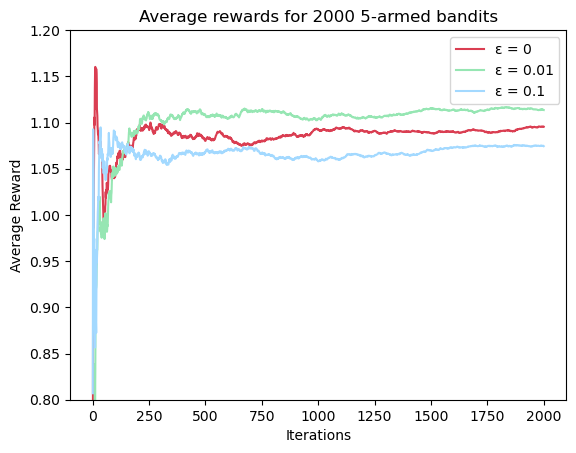

In [8]:
import matplotlib.pyplot as plt

# plot each e0_5, e001_5 and e1_5 against iterations
plt.plot(x, e0_5, label = "ε = 0",color="#DA3E52")
plt.plot(x, e001_5, label = "ε = 0.01", color="#96E6B3")
plt.plot(x, e1_5, label = "ε = 0.1", color="#A3D9FF")
plt.ylim(0.8,1.2)
plt.title("Average rewards for 2000 5-armed bandits")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

<h2>Data for 10-armed bandits</h2>

In [9]:
# 2000 10-armed bandits for each e = 0, 0.01 and 0.01
# e.g. e0_10 = epsilon value = 0, num_of_arms = 10
e0_10 = MultiBandits(2000, 10, 2000, 0);
e001_10 = MultiBandits(2000, 10, 2000, 0.01);
e1_10 = MultiBandits(2000, 10, 2000, 0.1);

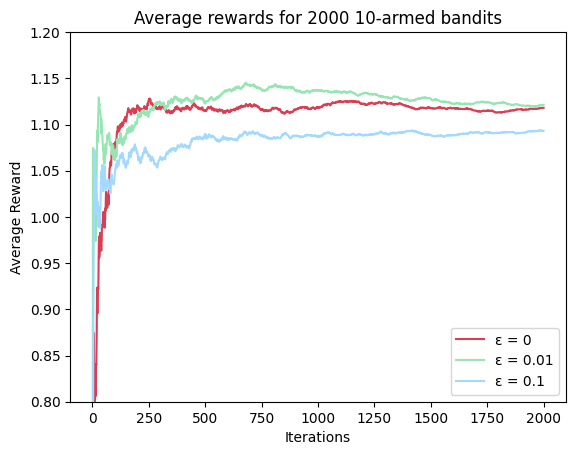

In [10]:
# plot each e0_10, e001_10 and e1_10 against iterations
plt.plot(x, e0_10, label = "ε = 0",color="#DA3E52")
plt.plot(x, e001_10, label = "ε = 0.01", color="#96E6B3")
plt.plot(x, e1_10, label = "ε = 0.1", color="#A3D9FF")
plt.ylim(0.8,1.2)
plt.title("Average rewards for 2000 10-armed bandits")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

<h2>Data for 20-armed bandits</h2>

In [11]:
# 2000 20-armed bandits for each e = 0, 0.01 and 0.01
# e.g. e0_20 = epsilon value = 0, num_of_arms = 20
e0_20 = MultiBandits(2000, 20, 2000, 0);
e001_20 = MultiBandits(2000, 20, 2000, 0.01);
e1_20 = MultiBandits(2000, 20, 2000, 0.1);

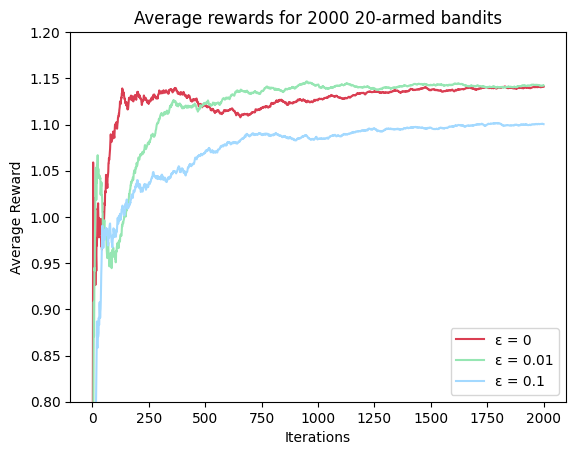

In [12]:
# plot each e0_20, e001_20 and e1_20 against iterations
plt.plot(x, e0_20, label = "ε = 0",color="#DA3E52")
plt.plot(x, e001_20, label = "ε = 0.01", color="#96E6B3")
plt.plot(x, e1_20, label = "ε = 0.1", color="#A3D9FF")
plt.ylim(0.8,1.2)
plt.title("Average rewards for 2000 20-armed bandits")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.legend()
plt.show()